In [116]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import StratifiedShuffleSplit
import math
import json
import sys

In [50]:
restaurents_data = pd.read_csv("zomato.csv")
restaurents_data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [51]:
df_citywise = restaurents_data[['Aggregate rating','Votes']].groupby(restaurents_data.City).sum()
df_citywise

,Aggregate rating,Votes
City,,
Abu Dhabi,86.0,6045
Agra,79.3,2062
Ahmedabad,87.4,12266
Albany,71.1,1676
Allahabad,67.9,1392
...,...,...
Weirton,3.9,156
Wellington City,85.0,2926
Winchester Bay,3.2,16


In [52]:
restaurents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [53]:
# restaurents_basic_data = restaurents_data[['Restaurant ID', 'Restaurant Name', 'City','Address', 'Locality', 'Longitude', 'Latitude', 'Aggregate rating', 'Rating text','Votes']].copy()
# restaurents_basic_data

In [54]:
# restaurents_important_data = restaurents_data[['Restaurant ID', 'Restaurant Name', 'Cuisines','Average Cost for two','Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range','Aggregate rating', 'Votes']].copy()
# restaurents_important_data

In [55]:
restaurents_data['Has Table booking'].replace({"No": 0, "Yes": 1}, inplace=True)

In [56]:
restaurents_data['Has Online delivery'].replace({"No": 0, "Yes": 1}, inplace=True)

In [57]:
restaurents_data['Is delivering now'].replace({"No": 0, "Yes": 1}, inplace=True)

In [58]:
restaurents_data['Switch to order menu'].replace({"No": 0, "Yes": 1}, inplace=True)

In [59]:
restaurents_data_city_wise = restaurents_data[['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'City']].groupby(restaurents_data.City, as_index=True).sum()

In [60]:
city_new = restaurents_data['City']
city_n = city_new.drop_duplicates().sort_values()
city_n = city_n.reset_index()

ccity = city_n['City'].values 

In [61]:
restaurents_data_city_wise['City'] = ccity
restaurents_data_city_wise 

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,City
City,,,,,
Abu Dhabi,6,11,0,0,Abu Dhabi
Agra,0,0,0,0,Agra
Ahmedabad,0,11,0,0,Ahmedabad
Albany,0,0,0,0,Albany
Allahabad,0,0,0,0,Allahabad
...,...,...,...,...,...
Weirton,0,0,0,0,Weirton
Wellington City,0,0,0,0,Wellington City
Winchester Bay,0,0,0,0,Winchester Bay


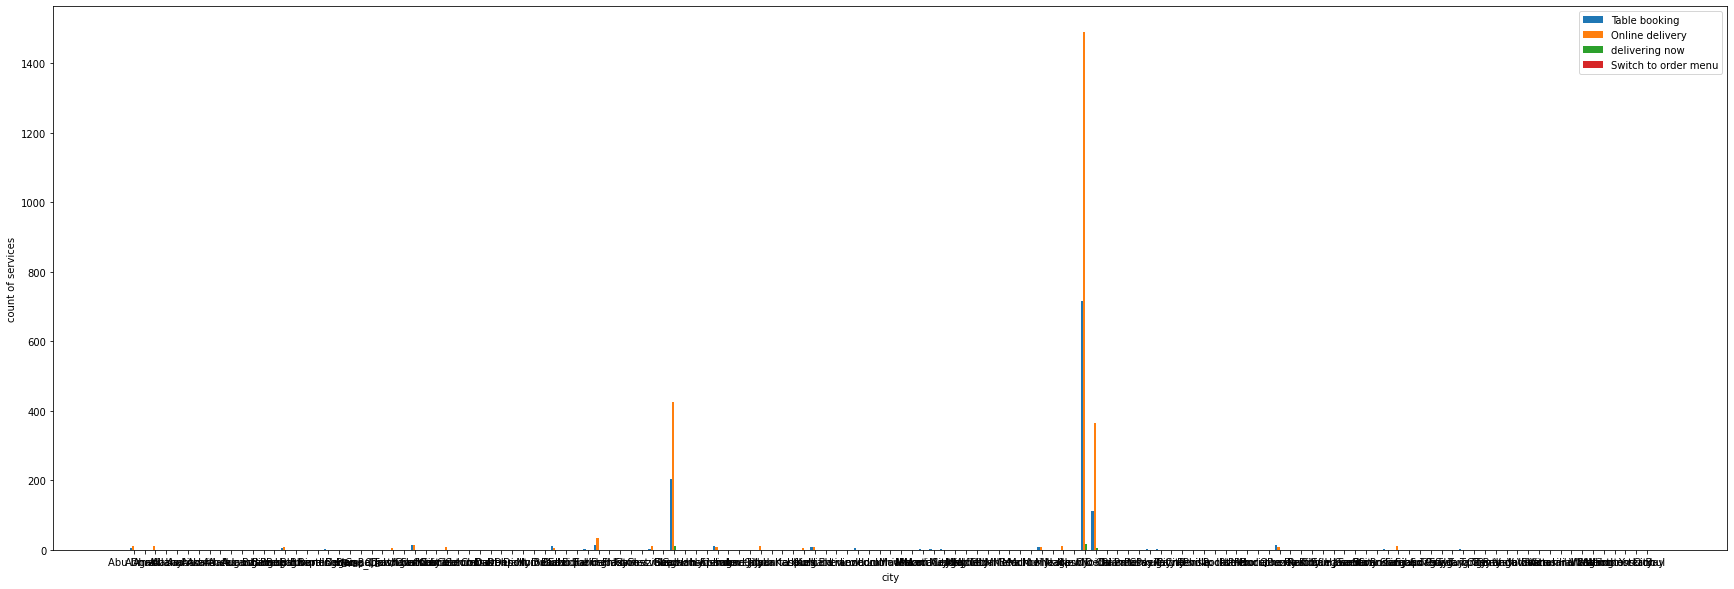

In [62]:
x = restaurents_data_city_wise['City']
x1 = restaurents_data_city_wise['Has Table booking']
x2 = restaurents_data_city_wise['Has Online delivery']
x3 = restaurents_data_city_wise['Is delivering now']
x4 = restaurents_data_city_wise['Switch to order menu']

X_axis = np.arange(len(x)) 
plt.subplots(figsize=(30,10))
plt.bar(X_axis - 0.3, x1, 0.2, label = 'Table booking')
plt.bar(X_axis - 0.1, x2, 0.2, label = 'Online delivery')
plt.bar(X_axis + 0.1, x3, 0.2, label = 'delivering now')
plt.bar(X_axis + 0.3, x4, 0.2, label = 'Switch to order menu')

plt.xticks(X_axis,x)
plt.ylabel("count of services")
plt.xlabel("city")

plt.legend()
plt.show()

In [63]:
restaurents_data_currency_wise = restaurents_data[['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']].groupby(restaurents_data.Currency, as_index=True).sum()


In [64]:

currency_new = restaurents_data['Currency']
currency_n = currency_new.drop_duplicates().sort_values()
currency_n = currency_n.reset_index()
ccurrency = currency_n['Currency'].values


In [65]:

restaurents_data_currency_wise['Currency'] = ccurrency
restaurents_data_currency_wise

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Currency
Currency,,,,,
Botswana Pula(P),14,0,0,0,Botswana Pula(P)
Brazilian Real(R$),0,0,0,0,Brazilian Real(R$)
Dollar($),0,0,0,0,Dollar($)
Emirati Diram(AED),18,28,0,0,Emirati Diram(AED)
Indian Rupees(Rs.),1111,2423,34,0,Indian Rupees(Rs.)
Indonesian Rupiah(IDR),0,0,0,0,Indonesian Rupiah(IDR)
NewZealand($),0,0,0,0,NewZealand($)
Pounds(),12,0,0,0,Pounds()
Qatari Rial(QR),1,0,0,0,Qatari Rial(QR)


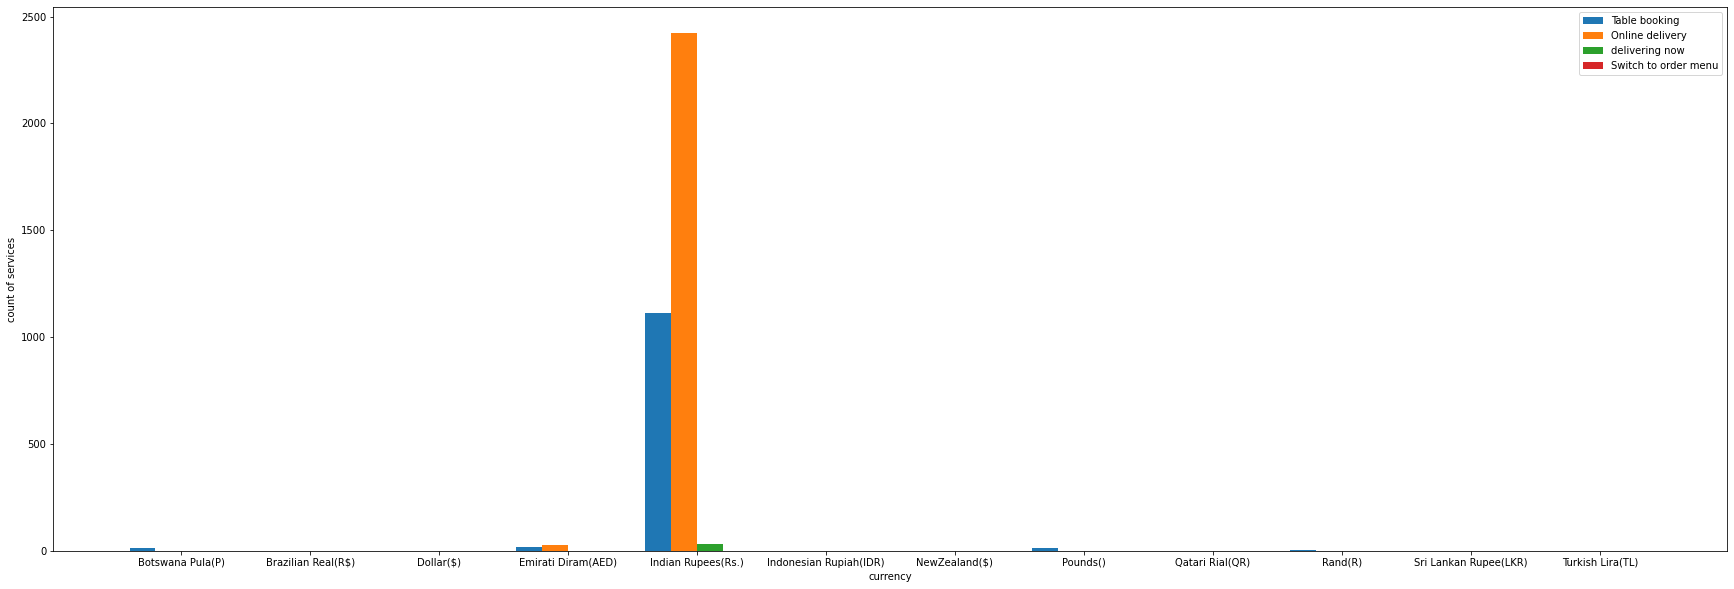

In [66]:
x = restaurents_data_currency_wise['Currency']
x1 = restaurents_data_currency_wise['Has Table booking']
x2 = restaurents_data_currency_wise['Has Online delivery']
x3 = restaurents_data_currency_wise['Is delivering now']
x4 = restaurents_data_currency_wise['Switch to order menu']

X_axis = np.arange(len(x)) 
plt.subplots(figsize=(30,10))
plt.bar(X_axis - 0.3, x1, 0.2, label = 'Table booking')
plt.bar(X_axis - 0.1, x2, 0.2, label = 'Online delivery')
plt.bar(X_axis + 0.1, x3, 0.2, label = 'delivering now')
plt.bar(X_axis + 0.3, x4, 0.2, label = 'Switch to order menu')

plt.xticks(X_axis,x)
plt.ylabel("count of services")
plt.xlabel("currency")

plt.legend()
plt.show()

In [67]:
restaurents_count_city_wise = restaurents_data.pivot_table(columns=['City'], aggfunc='size', )
restaurents_count_city_wise.sort_values()

City
Ojo Caliente         1
Clatskanie           1
Cochrane             1
Phillip Island       1
Potrero              1
                  ... 
Ghaziabad           25
Faridabad          251
Noida             1080
Gurgaon           1118
New Delhi         5473
Length: 141, dtype: int64

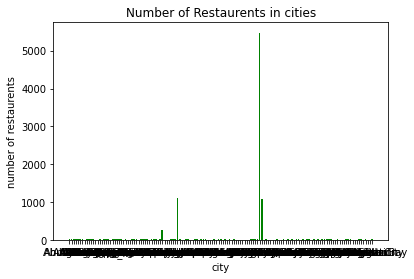

In [68]:
height = restaurents_count_city_wise.values
left =  np.arange(len(height)) 

tick_label = restaurents_data_city_wise['City']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['green'],)
 
plt.xlabel('city')
plt.ylabel('number of restaurents')
plt.title('Number of Restaurents in cities')
 
plt.show()

In [69]:
df_cities_with_max_restaurents = restaurents_data
idx = df_cities_with_max_restaurents["City"].isin(["New Delhi","Faridabad","Ghaziabad","Noida","Gurgaon"])
df_cities_with_max_restaurents = df_cities_with_max_restaurents[idx]
df_cities_with_max_restaurents

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),0,0,0,0,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),0,0,0,0,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,...,Indian Rupees(Rs.),0,0,0,0,1,2.8,Orange,Average,8
868,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,...,Indian Rupees(Rs.),0,0,0,0,1,2.9,Orange,Average,8
869,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,...,Indian Rupees(Rs.),0,0,0,0,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,18255134,Sky Grill,1,Noida,"2nd Floor, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367524,28.557537,"North Indian, Chinese",...,Indian Rupees(Rs.),0,1,0,0,2,2.6,Orange,Average,34
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,Indian Rupees(Rs.),0,0,0,0,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,Indian Rupees(Rs.),0,0,0,0,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,Indian Rupees(Rs.),0,0,0,0,2,0.0,White,Not rated,0


In [70]:
df_cities_with_max_restaurents = restaurents_data_city_wise
idx = df_cities_with_max_restaurents["City"].isin(["New Delhi","Faridabad","Ghaziabad","Noida","Gurgaon"])
df_cities_with_max_restaurents = df_cities_with_max_restaurents[idx]
df_cities_with_max_restaurents

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,City
City,,,,,
Faridabad,15,35,0,0,Faridabad
Ghaziabad,3,10,0,0,Ghaziabad
Gurgaon,204,425,12,0,Gurgaon
New Delhi,715,1489,16,0,New Delhi
Noida,112,364,5,0,Noida


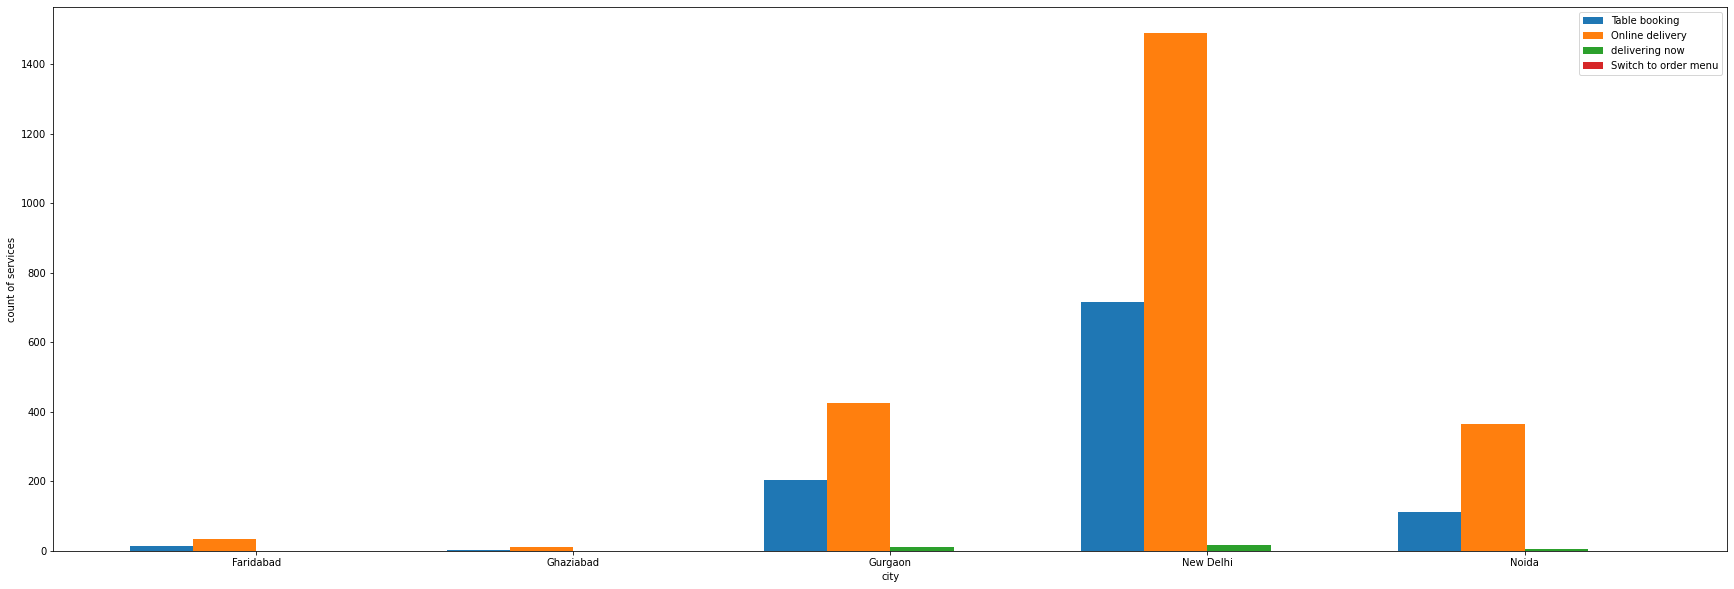

In [71]:
x = df_cities_with_max_restaurents['City']
x1 = df_cities_with_max_restaurents['Has Table booking']
x2 = df_cities_with_max_restaurents['Has Online delivery']
x3 = df_cities_with_max_restaurents['Is delivering now']
x4 = df_cities_with_max_restaurents['Switch to order menu']

X_axis = np.arange(len(x)) 
plt.subplots(figsize=(30,10))
plt.bar(X_axis - 0.3, x1, 0.2, label = 'Table booking')
plt.bar(X_axis - 0.1, x2, 0.2, label = 'Online delivery')
plt.bar(X_axis + 0.1, x3, 0.2, label = 'delivering now')
plt.bar(X_axis + 0.3, x4, 0.2, label = 'Switch to order menu')

plt.xticks(X_axis,x)
plt.ylabel("count of services")
plt.xlabel("city")

plt.legend()
plt.show()

<AxesSubplot:>

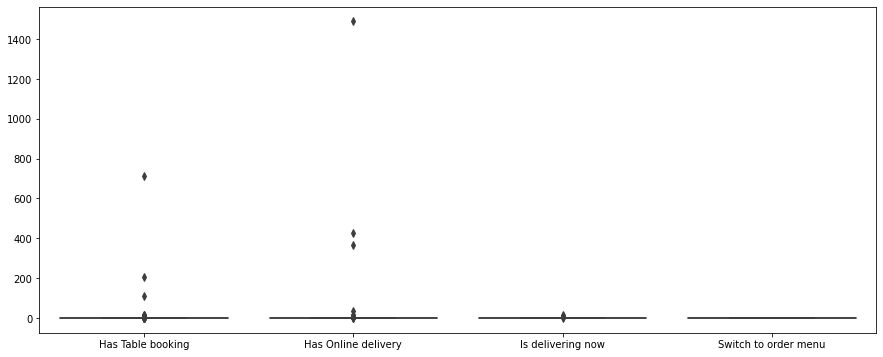

In [72]:
ax = plt.subplots(figsize=(15,6))
sns.boxplot(data= restaurents_data_city_wise.iloc[:,0:4])

<AxesSubplot:>

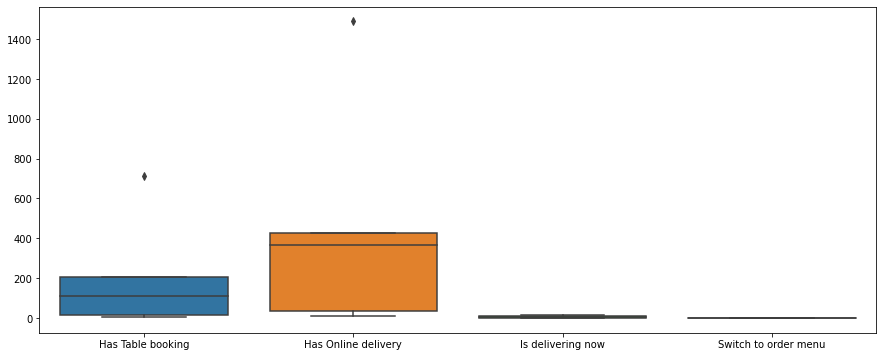

In [73]:
ax = plt.subplots(figsize=(15,6))
sns.boxplot(data= df_cities_with_max_restaurents.iloc[:,0:4])

<AxesSubplot:>

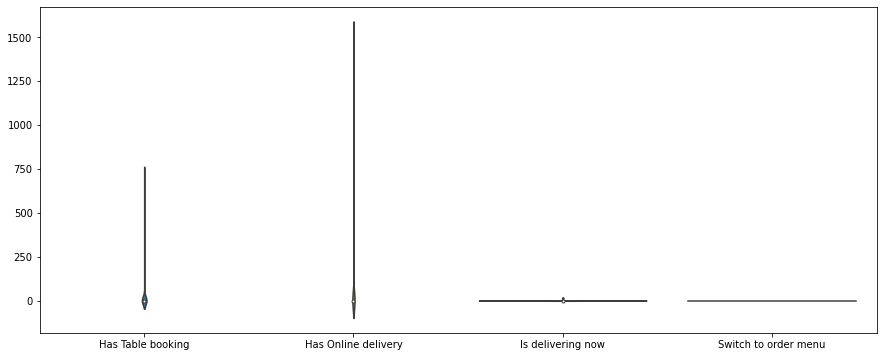

In [74]:
ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=restaurents_data_city_wise.iloc[:,0:4])

<AxesSubplot:>

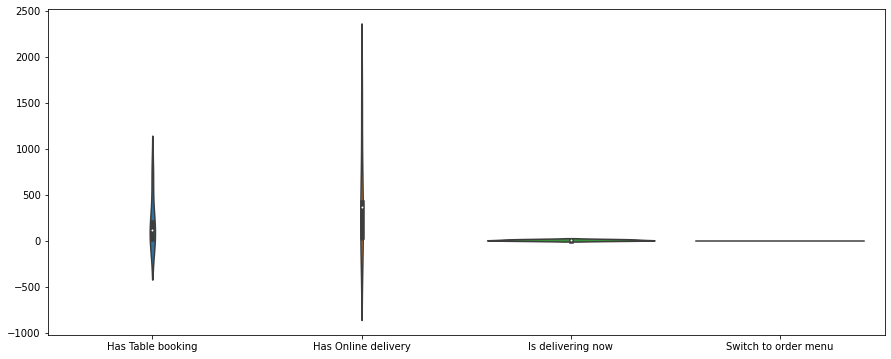

In [75]:
ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=df_cities_with_max_restaurents.iloc[:,0:4])

<AxesSubplot:>

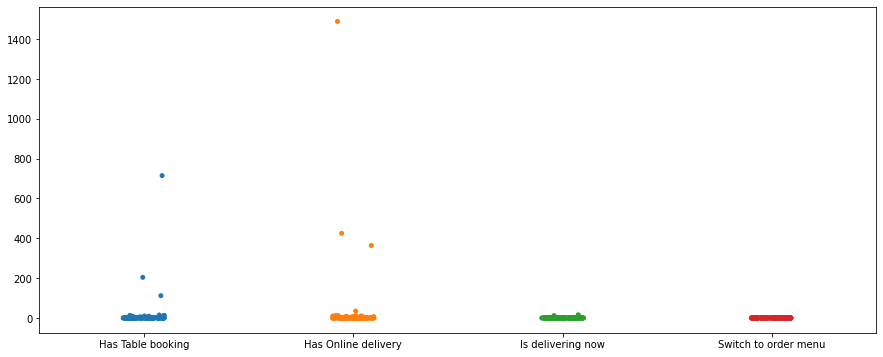

In [76]:
ax = plt.subplots(figsize=(15,6))
sns.stripplot(data=restaurents_data_city_wise.iloc[:,0:4])

<AxesSubplot:>

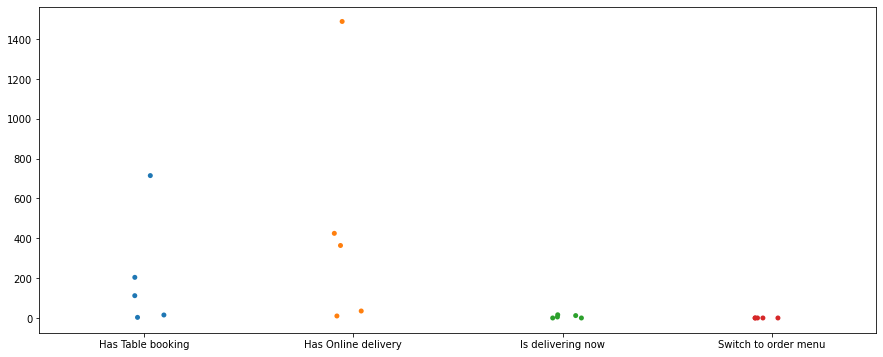

In [77]:
ax = plt.subplots(figsize=(15,6))
sns.stripplot(data=df_cities_with_max_restaurents.iloc[:,0:4])

In [78]:
df_restaurents = df_cities_with_max_restaurents
label=["New Delhi","Faridabad","Ghaziabad","Noida","Gurgaon"]

<AxesSubplot:title={'center':'Number of restaurents Has Online delivery'}, ylabel='Has Online delivery'>

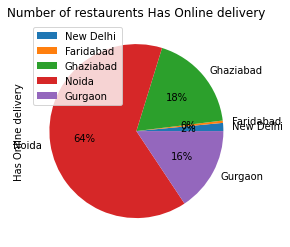

In [79]:
df_restaurents.plot.pie(x='City',y='Has Online delivery',labels=label, autopct='%.0f%%',title="Number of restaurents Has Online delivery")

/home/kapil/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


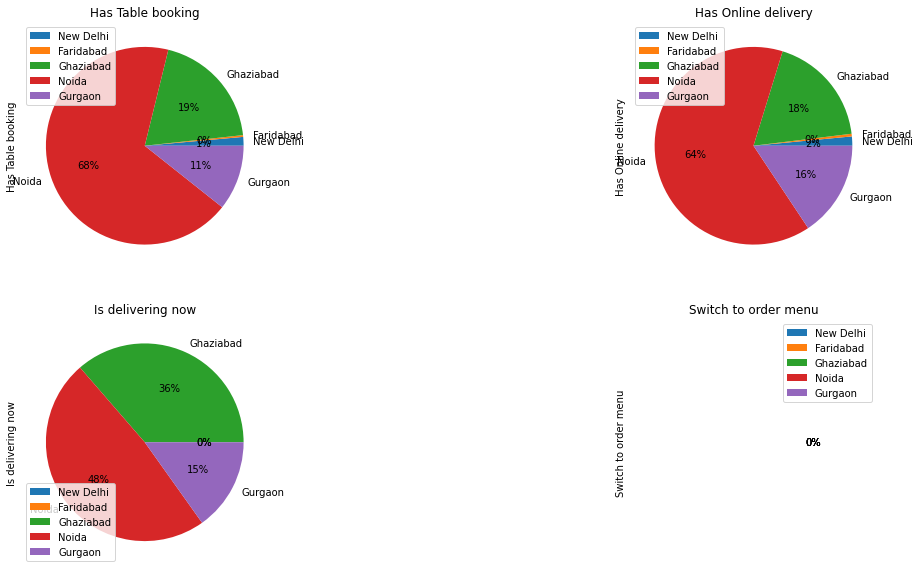

In [80]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
df_restaurents.plot.pie(x='City',y='Has Table booking',labels=label, autopct='%.0f%%',ax=axes[0,0],title="Has Table booking")
df_restaurents.plot.pie(x='City',y='Has Online delivery',labels=label, autopct='%.0f%%', ax=axes[0,1],title='Has Online delivery')
df_restaurents.plot.pie(x='City',y='Is delivering now',labels=label, autopct='%.0f%%', ax=axes[1,0],title='Is delivering now')
df_restaurents.plot.pie(x='City',y='Switch to order menu',labels=label, autopct='%.0f%%',ax=axes[1,1],title="Switch to order menu")
# axes[1,1].axis('off')

plt.show()

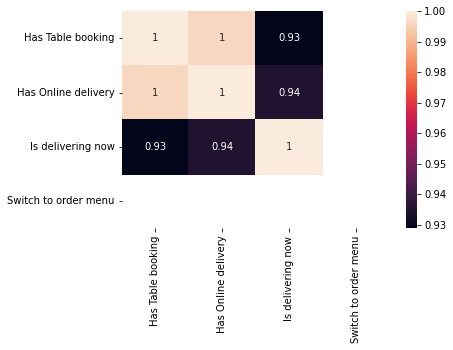

In [81]:
ax = sns.heatmap(restaurents_data_city_wise.corr() , annot = True)

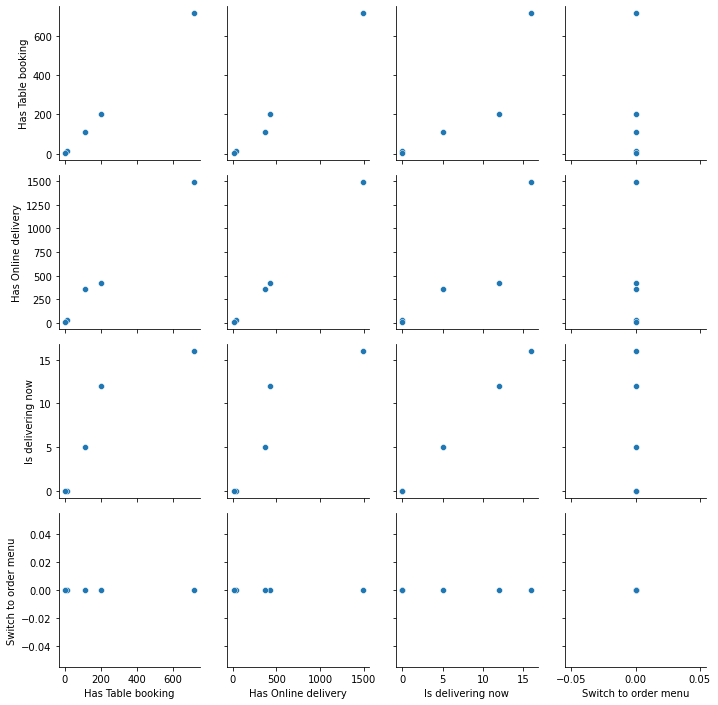

In [82]:
g = sns.PairGrid(
    df_restaurents[['Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu']])
g.map(sns.scatterplot)

In [83]:
# finding mean and median of Aggregate rating of each restaurent
restaurents_data_mean = restaurents_data["Aggregate rating"].mean() 
restaurents_data_median = restaurents_data["Aggregate rating"].median()


In [84]:
# printing mean and median
print("Mean of restaurents data Aggregate rating ", restaurents_data_mean)
print("Median of restaurents data Aggregate rating ", restaurents_data_median)

Mean of restaurents data Aggregate rating  2.66637001361114
Median of restaurents data Aggregate rating  3.2


<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

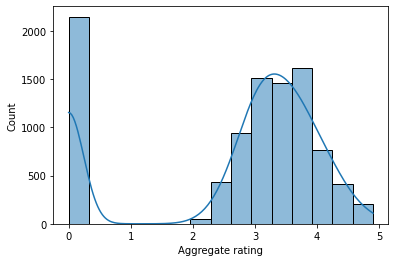

In [85]:
# plotting the histplot for Aggregate rating of each restaurent against number of restaurents
sns.histplot(data=restaurents_data, x="Aggregate rating",bins=15,kde=True)

<AxesSubplot:ylabel='Aggregate rating'>

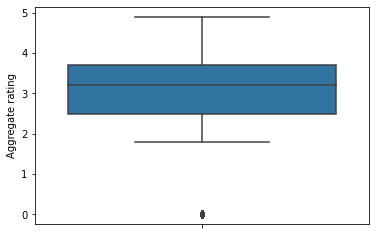

In [86]:
# plotting box plot to know the outliers
sns.boxplot(y=restaurents_data["Aggregate rating"])

In [87]:
#  Sorting Data based on Aggregate rating
sorted_restaurents_data = restaurents_data.sort_values(by=['Aggregate rating'])

In [88]:
#  Finding and printing the trimmed mean for stocks data with considering trimmed percentage 10%
trimmed_percentage_restaurents_data = 0.1
trimmed_data = math.floor(len(sorted_restaurents_data) * trimmed_percentage_restaurents_data)
trimmed_mean_restaurents_data = sorted_restaurents_data["Aggregate rating"].iloc[trimmed_data:len(sorted_restaurents_data) - trimmed_data].mean()

In [89]:
print("The trimmed mean of given stocks data is",trimmed_mean_restaurents_data)

The trimmed mean of given stocks data is 2.7852898835230993


In [90]:
# finding deviation of each Aggregate rating restaurent from mean
restaurents_data["Aggregate rating"] - restaurents_data["Aggregate rating"].mean()

0       2.13363
1       1.83363
2       1.73363
3       2.23363
4       2.13363
         ...   
9546    1.43363
9547    1.53363
9548    1.03363
9549    1.33363
9550    1.33363
Name: Aggregate rating, Length: 9551, dtype: float64

In [92]:
print("The standard deviation of given restaurents data is ", restaurents_data["Aggregate rating"].std())

The standard deviation of given restaurents data is  1.5163775396521328


In [93]:
print("The variance of given restaurents data is ", restaurents_data["Aggregate rating"].var())

The variance of given restaurents data is  2.2994008427614556


In [94]:
print("Mean absolute Deviation of given restaurents data ",((restaurents_data["Aggregate rating"] - restaurents_data["Aggregate rating"].mean()).abs()).mean())

Mean absolute Deviation of given restaurents data  1.2201622837117274


In [95]:
# Median absolute deviation from the median
restaurents_data_deviation = restaurents_data["Aggregate rating"] - restaurents_data["Aggregate rating"].median()
restaurents_data_deviation_absolute = restaurents_data_deviation.abs()
restaurents_data_deviation_absolute_sorted = restaurents_data_deviation_absolute.sort_values()


In [96]:
print("Median absolute deviation from the median of the data is", restaurents_data_deviation_absolute_sorted.median())

Median absolute deviation from the median of the data is 0.5


In [97]:
restaurents_data_pe_sorted = restaurents_data["Aggregate rating"].sort_values()


In [98]:
print("Maximum value in the data", restaurents_data_pe_sorted.iloc[-1])
print("Minimum value in the data", restaurents_data_pe_sorted.iloc[0])


Maximum value in the data 4.9
Minimum value in the data 0.0


In [99]:
range_restaurents_data = restaurents_data_pe_sorted.iloc[-1] - restaurents_data_pe_sorted.iloc[0]
print("The range of given data is", range_restaurents_data)

The range of given data is 4.9


In [100]:
#finding the threshold
restaurents_data_percentile_threshold = restaurents_data["Aggregate rating"].quantile(0.5)


In [101]:

print("Threshold value", restaurents_data_percentile_threshold)
print((restaurents_data["Aggregate rating"] <= restaurents_data_percentile_threshold).sum() + 1)

Threshold value 3.2
5091


In [102]:
# finding and printing the IQR for the given restaurents data
inter_quartile_range_restaurents_data = restaurents_data["Aggregate rating"].quantile(0.75) - restaurents_data["Aggregate rating"].quantile(0.25)
print("The Inter Quartile Range of given restaurents data is", inter_quartile_range_restaurents_data)

The Inter Quartile Range of given restaurents data is 1.2000000000000002


In [105]:
restaurents_crosstab=pd.crosstab(restaurents_data_city_wise['Has Online delivery'],
            restaurents_count_city_wise.values, 
            margins = False)
restaurents_crosstab

col_0,1,2,3,4,6,11,14,16,18,20,21,25,251,1080,1118,5473
Has Online delivery,,,,,,,,,,,,,,,,
0,45,7,2,2,1,1,1,1,0,55,4,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


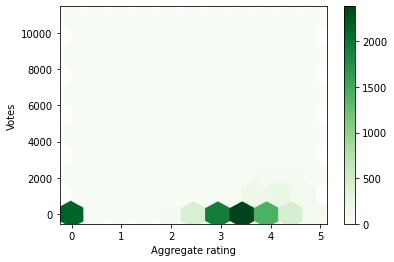

In [109]:
data1="Aggregate rating"
data2="Votes"
hb=plt.hexbin(restaurents_data[data1], 
           restaurents_data[data2], 
            gridsize = 10,
           cmap ='Greens') 
plt.xlabel(data1)
plt.ylabel(data2)
cb = plt.colorbar(hb)
plt.show()

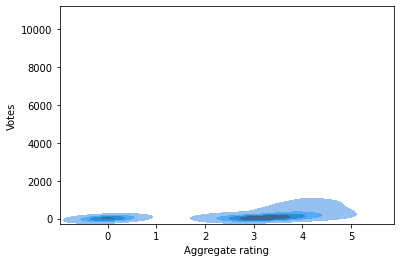

In [110]:
sns.kdeplot(data= restaurents_data, x=data1, y=data2,fill=True,levels=5)
plt.xlabel(data1)
plt.ylabel(data2)
plt.show()

In [131]:
real_mean = round(restaurents_data['Aggregate rating'].mean(),3)
real_mean

2.666

In [127]:
#collecting random sample data
sample_random_sample = restaurents_data.sample(n=1000).sort_index()




In [129]:
#storing sample mean to another var
sample_random_mean = round(sample_random_sample['Aggregate rating'].mean(),3)

sample_random_mean

2.659

In [130]:
def systematic_sampling(df, step): 
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

In [113]:
#collecting systamatic sample data
systematic_sample = systematic_sampling(restaurents_data, 10)

In [115]:
#storing sample mean to another var
systematic_mean = round(systematic_sample['Aggregate rating'].mean(),3)
systematic_mean

2.648

In [132]:
outcomes = {'sample_mean':[sample_random_mean,systematic_mean],'population_mean':real_mean}

In [134]:
# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling'])

In [135]:
# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['population_mean'] - outcomes['sample_mean'])

In [136]:
# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,population_mean,abs_error
Simple Random Sampling,2.659,2.666,0.007
Systematic Sampling,2.648,2.666,0.018


Central limit theorem

In [139]:
data = restaurents_data["Aggregate rating"]


In [142]:
real_mean = round(data.mean(),3)

In [144]:
# Size of samples
num = [1, 10, 50, 100]
means = []

for j in num:
    # Generate 1000 samples of size j from the height data
    x = [round(data.sample(n=j).mean(), 3) for i in range(1000)]
    means.append(x)

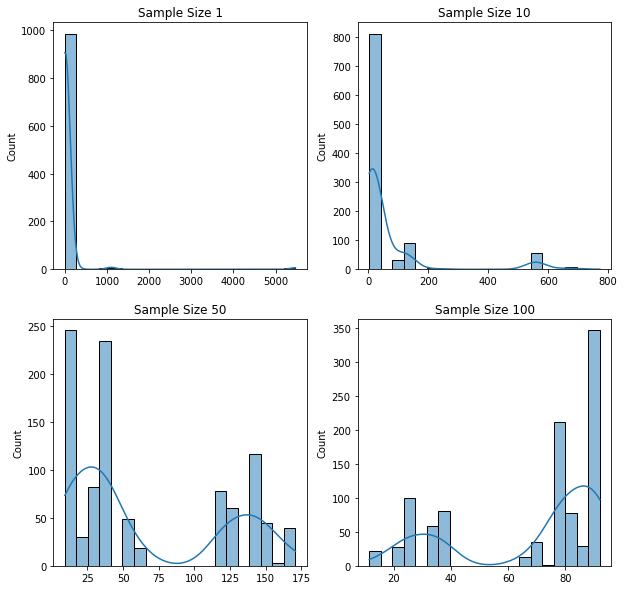

In [145]:
k = 0
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bell = np.random.normal(size=10000)

for i in range(0, 2):
    for j in range(0, 2):
        sns.histplot(data=means[k],ax=ax[i,j],kde=True,bins=20)
        ax[i, j].set_title(label="Sample Size {x}".format(x = num[k]))
        k = k + 1

Bootstrap on ”Aggragate rating” of reataurents

In [146]:
number_of_samples=10000 # R times
size_of_sample=300  # n
sample_mean=[]
for i in range(number_of_samples):
    # Calulate mean for n samples
    sample_mean.append(np.mean(np.random.choice(data,size_of_sample,replace=True)))

standard error :  0.27430085892450856


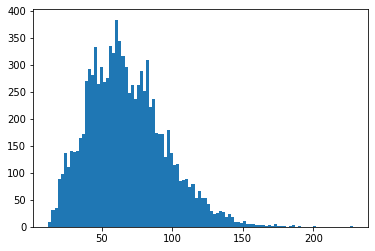

In [147]:
_=plt.hist(sample_mean,bins=100)
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
print("standard error : ", standard_error)

In [148]:
# confidence interval

CI=0.95
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 22.8
Upper level : 128.39666666666668
